In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [ ]:

df = pd.read_csv("gesture_data_2.csv")
df.head()

,Time,S1,S2,S3,S4,S5,S6,Class
0,1.4102,0.009775,2.0919,0.004888,0.004888,0.014663,0.004888,1
1,2.3638,0.004888,2.1017,0.004888,0.004888,0.014663,0.004888,1
2,3.3050,0.004888,2.0968,0.004888,0.004888,0.014663,0.004888,1
3,4.1948,0.009775,2.1017,0.004888,0.004888,0.014663,0.004888,1
4,5.1011,0.009775,2.0674,0.004888,0.004888,0.014663,0.000000,1


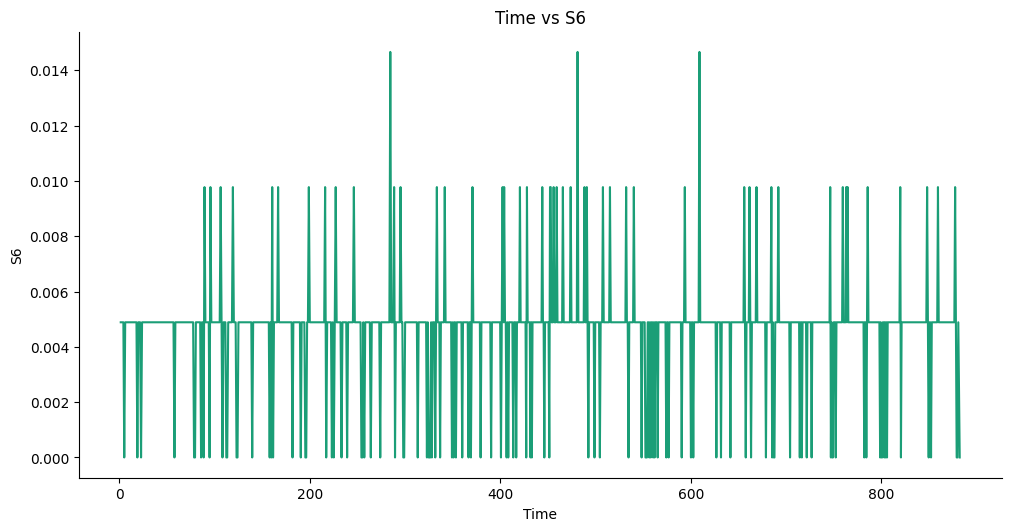

In [ ]:
# @title Time vs S1

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['S6']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Time vs S6')
plt.xlabel('Time')
_ = plt.ylabel('S6')

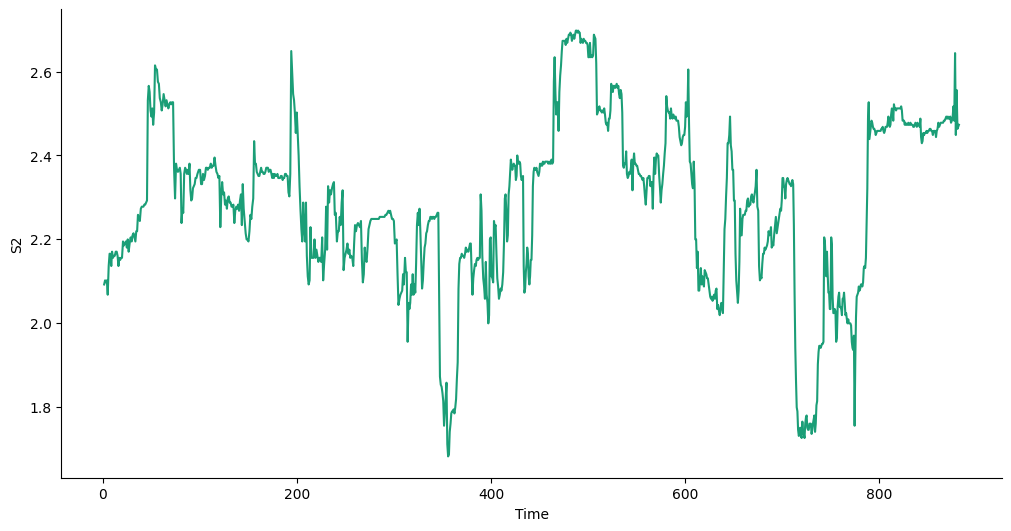

In [ ]:
# @title Time vs S2

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['S2']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('S2')

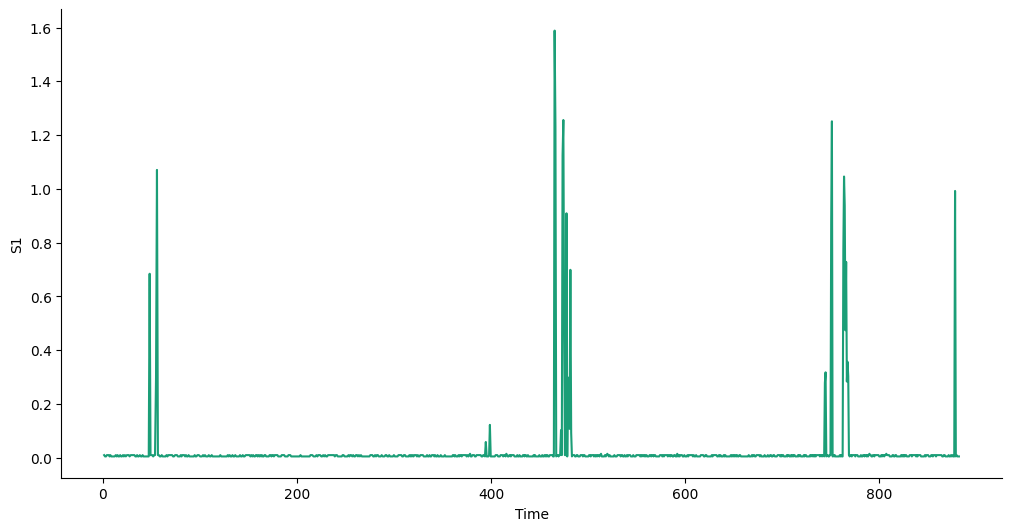

In [ ]:
# @title Time vs S1

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['S1']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('S1')

In [ ]:
x = df.iloc[:,0:7]
y = df['Class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
lr_grid = {'max_depth' : [2,4,8,16,32,64,128],
           'criterion' : ['entropy','gini']}
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
gs = GridSearchCV(estimator = clf, param_grid=lr_grid,cv = 10)
gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 16, 32, 64, 128]})

In [ ]:
y_pred = gs.predict(x_test)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 16}

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('Classification Report: \n', classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.89      0.89      0.89        18
           3       0.83      0.56      0.67         9
           4       0.83      0.91      0.87        22
           5       0.94      0.96      0.95        49
           6       0.96      0.96      0.96        23
           7       0.88      0.96      0.92        23
           8       0.89      0.73      0.80        11
           9       0.85      0.96      0.90        24
          10       0.93      0.76      0.84        17

    accuracy                           0.90       210
   macro avg       0.89      0.85      0.86       210
weighted avg       0.90      0.90      0.89       210



In [ ]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[12  0  0  0  1  0  0  0  0  1]
 [ 2 16  0  0  0  0  0  0  0  0]
 [ 0  1  5  3  0  0  0  0  0  0]
 [ 0  0  1 20  1  0  0  0  0  0]
 [ 0  0  0  1 47  1  0  0  0  0]
 [ 0  0  0  0  1 22  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  1  0]
 [ 0  0  0  0  0  0  3  8  0  0]
 [ 0  0  0  0  0  0  0  1 23  0]
 [ 0  1  0  0  0  0  0  0  3 13]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have a confusion matrix stored in a variable 'cm'
# cm = [[true_negatives, false_positives],
#       [false_negatives, true_positives]]
cm = confusion_matrix(y_test,y_pred)

# Calculate the total number of predictions
total_predictions = sum(sum(cm))

# Calculate accuracy
accuracy = (cm[0][0] + cm[1][1]) / total_predictions

# Calculate precision
precision = cm[1][1] / (cm[1][1] + cm[0][1])

# Calculate recall
recall = cm[1][1] / (cm[1][1] + cm[1][0])

# Calculate F1-score
f1_score = 2 * precision * recall / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Accuracy: 0.13333333333333333
Precision: 1.0
Recall: 0.8888888888888888
F1-score: 0.9411764705882353


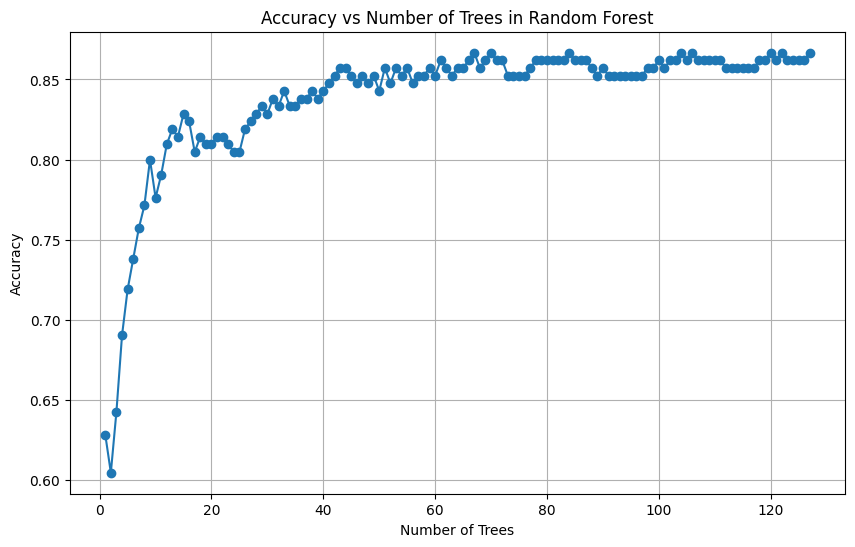

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
n_estimators_values = range(1, 128)
accuracy_values = []

for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_values, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.grid(True)
plt.show()